In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../day5/final_부동산.csv')
import warnings
warnings.filterwarnings('ignore')
df_부동산 = df[df['업종(대분류)'].str.contains('부동산업', na=False)]

In [2]:
df_부동산['기준년'] = df_부동산['기준년월']
df_부동산['기준월'] = df_부동산['기준년월']

In [3]:
# 총자산 = 유동자산 + 비유동자산
df_부동산['총자산'] = df_부동산['유동자산'] + df_부동산['비유동자산']

# 총부채 = 유동부채 + 비유동부채
df_부동산['총부채'] = df_부동산['유동부채'] + df_부동산['비유동부채']

# 부채비율 = 총부채 / 총자산
df_부동산['부채비율'] = df_부동산['총부채'] / (df_부동산['총자산'] + 1e-6)  # 0으로 나누는 것 방지

In [4]:
# 자기자본 = 총자산 - 총부채
df_부동산['자기자본'] = df_부동산['총자산'] - df_부동산['총부채']

# 자기자본비율 = 자기자본 / 총자산
df_부동산['자기자본비율'] = df_부동산['자기자본'] / (df_부동산['총자산'] + 1e-6)

# 총자산회전율 = 매출액 / 총자산
df_부동산['총자산회전율'] = df_부동산['매출액'] / (df_부동산['총자산'] + 1e-6)

# 매출총이익률 = 매출총이익 / 매출액
df_부동산['매출총이익률'] = df_부동산['매출총이익'] / (df_부동산['매출액'] + 1e-6)


In [5]:
# 연체 경험이 있는지 여부 (3년 이내 30일 이상 연체)
df_부동산['연체경험여부'] = (
    (df_부동산['기업신용공여연체기관수(일보)(3개월내유지)(연체일수30일이상)(해제포함)'] > 0)
).astype(int)

# 최근 연체 발생 후 경과일수 (음수는 없음으로 처리)
df_부동산['연체발생_경과일수'] = df_부동산[
    '신용도판단정보공공정보최근발생일자로부터경과일수(CIS)(해제,삭제)'
].clip(lower=0)

# 공공정보 유지건수 존재 여부
df_부동산['공공정보_유지여부'] = (
    df_부동산['공공정보(국세,지방세,관세체납)건수(CIS)(미해제)'] > 0
).astype(int)


In [6]:
df_부동산['총연체대출과목수'] = (
    df_부동산['기업신용공여연체과목수(일보)(미해제)']+
    df_부동산['기업신용공여연체과목수(일보)(3개월내유지)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(6개월내유지)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(1년내유지)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(3년내유지)(해제포함)']
)

df_부동산['총신규연체과목수'] = (
    df_부동산['기업신용공여연체과목수(일보)(3개월내발생)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(6개월내발생)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(1년내발생)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(3년내발생)(해제포함)']
)

In [7]:
df_부동산['총장기연체과목수'] = (
    df_부동산['기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(6개월내유지)(연체일수30일이상)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(1년내유지)(연체일수30일이상)(해제포함)']+
    df_부동산['기업신용공여연체과목수(일보)(3년내유지)(연체일수30일이상)(해제포함)']
)

df_부동산['이자원금_30일초과연체과목수'] = (
    df_부동산['기업신용공여30일이상연체과목수(일보)(이자연체)(해제포함)']+
    df_부동산['기업신용공여30일이상연체과목수(일보)(이자연체)(미해제)']
)

In [8]:
rename_map = {
    '기업신용공여연체기관수(일보)(3년내유지)(연체일수30일이상)(해제포함)': '연체기관수_3년',
    '기업신용공여연체기관수(일보)(1년내유지)(연체일수30일이상)(해제포함)': '연체기관수_1년',
    '기업신용공여연체기관수(일보)(6개월내유지)(연체일수30일이상)(해제포함)': '연체기관수_6개월',
    '기업신용공여연체기관수(일보)(3개월내유지)(연체일수30일이상)(해제포함)': '연체기관수_3개월',
    '기업신용공여연체과목수(일보)(3개월내발생)(해제포함)': '연체과목수_3개월발생',
    '기업신용공여연체과목수(일보)(3개월내유지)(연체일수30일이상)(해제포함)': '연체과목수_3개월유지',
    '기업신용공여30일이상연체기관수(일보)(해제포함)': '연체기관수_전체',
    '기업신용공여연체최장연체일수(일보)(3개월내발생)(해제포함)': '최장연체일수_3개월',
    '기업신용공여연체최장연체일수(일보)(6개월내발생)(해제포함)': '최장연체일수_6개월',
    '기업신용공여연체최장연체일수(일보)(1년내발생)(해제포함)': '최장연체일수_1년',
    '기업신용공여연체최장연체일수(일보)(3년내발생)(해제포함)': '최장연체일수_3년',
    '연체경험여부': '연체경험',
}


In [9]:
df_부동산.rename(columns=rename_map, inplace=True)


In [10]:
selected_features = [
    #'연체기관수_3년', '연체기관수_1년', '연체기관수_6개월', '연체기관수_3개월', '연체과목수_3개월발생',
       '연체과목수_3개월유지', '연체기관수_전체', '최장연체일수_3개월', '최장연체일수_6개월', '최장연체일수_1년',
       '최장연체일수_3년', '연체경험', '유동자산', '비유동자산', '자산총계', '유동부채', '비유동부채', '부채총계',
       '매출액', '매출총이익', '영업손익', '당기순이익', '영업활동현금흐름', '재무비율_부채비율', '재무비율_유동비율',
       '재무비율_자기자본비율', '재무비율_영업이익율', '재무비율_자기자본이익률(ROE)', 'EBITDA마진율',
       '영업이익증가율', '당기순이익증가율', 'EBITDA증가율', '설립일자', '사업장소유여부', '소유건축물건수',
       '소유건축물권리침해여부', '기업신용평가등급(구간화)', '공공정보_유지여부',

    # 타겟
    '모형개발용Performance(향후1년내부도여부)'
]


In [11]:
df_부동산['모형개발용Performance(향후1년내부도여부)'].value_counts(normalize=True)


모형개발용Performance(향후1년내부도여부)
0    0.970596
1    0.029404
Name: proportion, dtype: float64

In [12]:
df = df_부동산[selected_features]

In [13]:
df.describe(include='all')


,연체과목수_3개월유지,연체기관수_전체,최장연체일수_3개월,최장연체일수_6개월,최장연체일수_1년,최장연체일수_3년,연체경험,유동자산,비유동자산,자산총계,...,영업이익증가율,당기순이익증가율,EBITDA증가율,설립일자,사업장소유여부,소유건축물건수,소유건축물권리침해여부,기업신용평가등급(구간화),공공정보_유지여부,모형개발용Performance(향후1년내부도여부)
count,91824.000000,91824.000000,91824.000000,91824.000000,91824.000000,91824.000000,91824.000000,9.182400e+04,9.182400e+04,9.182400e+04,...,9.182400e+04,9.182400e+04,8.784600e+04,9.182400e+04,91824.000000,91824.000000,91824.000000,91824.000000,91824.000000,91824.000000
mean,0.007612,0.067303,0.332996,0.622463,1.125675,3.864436,0.004541,3.306553e+07,2.394534e+07,5.701087e+07,...,-4.800464e+01,1.024354e+02,-1.431989e+03,2.010128e+07,0.071463,39.990656,0.131382,5.270735,0.013384,0.029404
std,0.169487,0.397767,3.241048,5.164625,9.084944,27.032429,0.067236,9.577559e+07,1.099493e+08,1.818852e+08,...,5.125129e+04,2.407384e+04,9.618671e+04,9.458638e+04,0.257598,145.819942,0.337819,1.887303,0.114914,0.168937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000e+01,-1.596876e+08,-1.485682e+08,...,-8.075489e+06,-8.636362e+05,-7.325767e+06,1.945091e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.025364e+06,3.757668e+05,1.097142e+07,...,-1.370300e+02,-1.277375e+02,-6.300000e+01,2.007053e+07,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.311947e+07,3.546147e+06,2.219584e+07,...,-4.491000e+01,-1.049000e+01,0.000000e+00,2.013092e+07,0.000000,5.000000,0.000000,5.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.066007e+07,1.546890e+07,4.709659e+07,...,7.818000e+01,7.973000e+01,5.000000e+00,2.016072e+07,0.000000,26.000000,0.000000,7.000000,0.000000,0.000000
max,26.000000,12.000000,89.000000,161.000000,341.000000,820.000000,1.000000,4.470990e+09,6.348819e+09,9.200053e+09,...,1.281948e+07,4.040773e+06,4.307240e+05,2.021083e+07,1.000000,3206.000000,1.000000,10.000000,1.000000,1.000000


In [14]:
df = df.dropna()

In [15]:
df.isna().sum().sum()

0

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 🎯 입력 데이터
target = '모형개발용Performance(향후1년내부도여부)'
features = df.columns.drop(target)

# 1. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, random_state=42, stratify=df[target]
)

# 2. SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# 3. 스태킹 모델 구성
stack_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    n_jobs=-1
)

# 4. 학습
stack_model.fit(X_resampled, y_resampled)

# 5. 예측 및 성능 평가
y_pred = stack_model.predict(X_test)
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


📊 Confusion Matrix:
[[17005    52]
 [  117   396]]

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9932    0.9970    0.9951     17057
           1     0.8839    0.7719    0.8241       513

    accuracy                         0.9904     17570
   macro avg     0.9385    0.8844    0.9096     17570
weighted avg     0.9900    0.9904    0.9901     17570



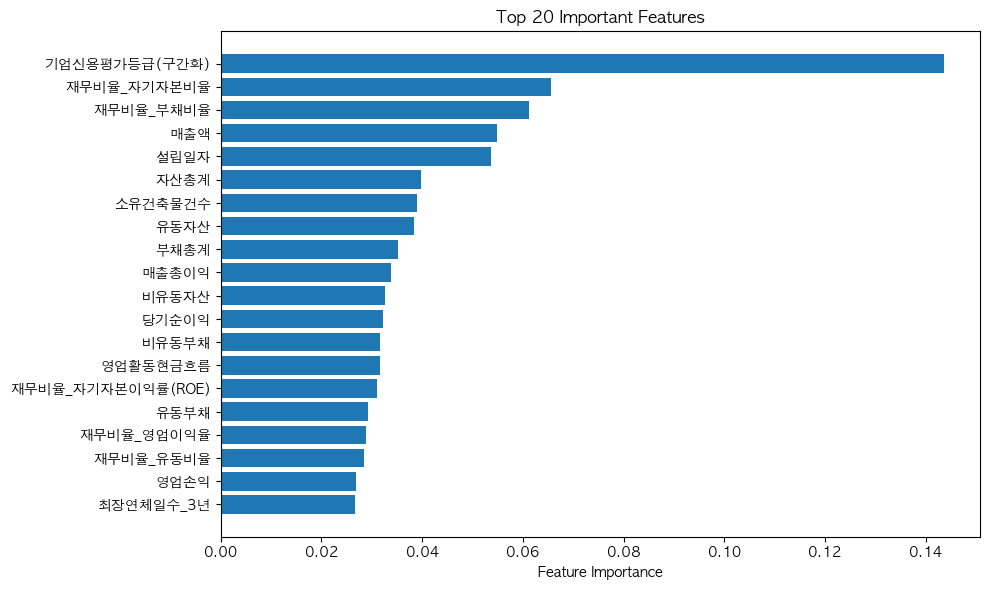

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# RandomForest 기반 피처 중요도 추출
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 상위 20개 피처 추출
top_n = 20
top_features = X_resampled.columns[indices[:top_n]]

# 시각화 (선택사항)
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[indices[:top_n]][::-1], align='center')
plt.yticks(range(top_n), X_resampled.columns[indices[:top_n]][::-1])
plt.xlabel("Feature Importance")
plt.title(f"Top {top_n} Important Features")
plt.tight_layout()
plt.show()


In [18]:
from xgboost import XGBClassifier

# 📌 중요 피처만 선택
X_top = X_resampled[top_features]

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 🔄 스태킹 모델 정의 및 학습
estimators = [
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(X_train, y_train)

# 🎯 예측 및 평가
y_pred = stacking_clf.predict(X_test)

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:01:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[15:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



📊 Confusion Matrix:
[[12851    34]
 [   38 13569]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12885
           1       1.00      1.00      1.00     13607

    accuracy                           1.00     26492
   macro avg       1.00      1.00      1.00     26492
weighted avg       1.00      1.00      1.00     26492



In [19]:
# 학습 데이터만 SMOTE-ENN 적용
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

model = stack_model
# 모델 학습
model.fit(X_train_resampled, y_train_resampled)

# 원본 테스트셋으로 평가
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[12846    39]
 [   43 13564]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12885
           1       1.00      1.00      1.00     13607

    accuracy                           1.00     26492
   macro avg       1.00      1.00      1.00     26492
weighted avg       1.00      1.00      1.00     26492



In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')

print("Cross-validated F1 scores:", scores)
print("Average F1:", scores.mean())


Cross-validated F1 scores: [0.99627535 0.99540018 0.99618514 0.99530516 0.99609213]
Average F1: 0.9958515932298312


In [20]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 🎯 입력 데이터
target = '모형개발용Performance(향후1년내부도여부)'
features = df.columns.drop(target)

# ✅ 1단계: 먼저 원본 데이터로 train/test 분할
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    df[features], df[target], 
    test_size=0.2, 
    random_state=42, 
    stratify=df[target]
)

print(f"원본 Train 크기: {X_train_orig.shape}")
print(f"원본 Test 크기: {X_test_orig.shape}")
print(f"Train 부도 비율: {y_train_orig.mean():.4f}")
print(f"Test 부도 비율: {y_test_orig.mean():.4f}")

# ✅ 2단계: Train 데이터에만 SMOTEENN 적용
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train_orig, y_train_orig)

print(f"리샘플링 후 Train 크기: {X_train_resampled.shape}")
print(f"리샘플링 후 부도 비율: {y_train_resampled.mean():.4f}")

# ✅ 3단계: Train 데이터에서만 피처 중요도 계산
rf_for_selection = RandomForestClassifier(n_estimators=100, random_state=42)
rf_for_selection.fit(X_train_resampled, y_train_resampled)

importances = rf_for_selection.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 상위 20개 피처 선택
top_n = 20
top_features = X_train_resampled.columns[indices[:top_n]]

print(f"\n선택된 상위 {top_n}개 피처:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}: {importances[indices[i]]:.4f}")

# ✅ 4단계: 선택된 피처로 모델 학습
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test_orig[top_features]  # ⚠️ 원본 test 데이터 사용!

# 스태킹 모델 정의
estimators = [
    ('xgb', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100))
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# 모델 학습
stacking_clf.fit(X_train_selected, y_train_resampled)

# ✅ 5단계: 원본 test 데이터로 평가
y_pred = stacking_clf.predict(X_test_selected)

print("\n" + "="*50)
print("📊 수정된 모델 결과:")
print("="*50)
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_orig, y_pred, digits=4))

# ✅ 추가: 확률 점수도 확인
y_pred_proba = stacking_clf.predict_proba(X_test_selected)[:, 1]
print(f"\n예측 확률 분포:")
print(f"최소값: {y_pred_proba.min():.4f}")
print(f"최대값: {y_pred_proba.max():.4f}")
print(f"평균값: {y_pred_proba.mean():.4f}")
print(f"표준편차: {y_pred_proba.std():.4f}")

원본 Train 크기: (70276, 33)
원본 Test 크기: (17570, 33)
Train 부도 비율: 0.0292
Test 부도 비율: 0.0292
리샘플링 후 Train 크기: (132460, 33)
리샘플링 후 부도 비율: 0.5136

선택된 상위 20개 피처:
1. 기업신용평가등급(구간화): 0.1436
2. 재무비율_자기자본비율: 0.0656
3. 재무비율_부채비율: 0.0613
4. 매출액: 0.0548
5. 설립일자: 0.0536
6. 자산총계: 0.0397
7. 소유건축물건수: 0.0389
8. 유동자산: 0.0384
9. 부채총계: 0.0351
10. 매출총이익: 0.0338
11. 비유동자산: 0.0327
12. 당기순이익: 0.0322
13. 비유동부채: 0.0317
14. 영업활동현금흐름: 0.0316
15. 재무비율_자기자본이익률(ROE): 0.0310
16. 유동부채: 0.0293
17. 재무비율_영업이익율: 0.0288
18. 재무비율_유동비율: 0.0283
19. 영업손익: 0.0268
20. 최장연체일수_3년: 0.0268


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:08:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[15:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[15:09:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




📊 수정된 모델 결과:
Confusion Matrix:
[[16980    77]
 [  107   406]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9937    0.9955    0.9946     17057
           1     0.8406    0.7914    0.8153       513

    accuracy                         0.9895     17570
   macro avg     0.9172    0.8935    0.9049     17570
weighted avg     0.9893    0.9895    0.9894     17570


예측 확률 분포:
최소값: 0.0001
최대값: 0.9998
평균값: 0.0299
표준편차: 0.1595


In [21]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

# 🎯 현재까지의 베스트 모델 성능 기록
print("=" * 60)
print("🏆 현재 베스트 모델 성능 (F1-score: 0.8153)")
print("=" * 60)

# 📊 클래스별 가중치 계산 (불균형 데이터 대응)
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(y_train_resampled), 
    y=y_train_resampled
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"계산된 클래스 가중치: {class_weight_dict}")

# 🔍 1단계: XGBoost 개별 튜닝
print("\n🔍 1단계: XGBoost 하이퍼파라미터 튜닝...")

xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.29),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 4),
    'scale_pos_weight': [1, 2, 3, 5, 10]  # 불균형 데이터 대응
}

# F1-score 기준으로 평가
f1_scorer = make_scorer(f1_score, pos_label=1)

xgb_random = RandomizedSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=xgb_param_dist,
    n_iter=50,  # 50번 시도
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

xgb_random.fit(X_train_selected, y_train_resampled)

print(f"✅ XGBoost 최적 파라미터:")
for param, value in xgb_random.best_params_.items():
    print(f"   {param}: {value}")
print(f"✅ XGBoost 최적 CV F1-score: {xgb_random.best_score_:.4f}")

# 🌳 2단계: RandomForest 개별 튜닝
print("\n🌳 2단계: RandomForest 하이퍼파라미터 튜닝...")

rf_param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(randint(5, 30).rvs(10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=f1_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rf_random.fit(X_train_selected, y_train_resampled)

print(f"✅ RandomForest 최적 파라미터:")
for param, value in rf_random.best_params_.items():
    print(f"   {param}: {value}")
print(f"✅ RandomForest 최적 CV F1-score: {rf_random.best_score_:.4f}")

# 🎯 3단계: 최적화된 스태킹 모델 구성
print("\n🎯 3단계: 최적화된 스태킹 모델 학습...")

optimized_estimators = [
    ('xgb_tuned', xgb_random.best_estimator_),
    ('rf_tuned', rf_random.best_estimator_)
]

# LogisticRegression 메타 학습기도 튜닝
lr_param_dist = {
    'C': uniform(0.01, 10),
    'class_weight': ['balanced', None],
    'solver': ['liblinear', 'lbfgs']
}

lr_random = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_distributions=lr_param_dist,
    n_iter=20,
    cv=3,
    scoring=f1_scorer,
    random_state=42
)

lr_random.fit(X_train_selected, y_train_resampled)

optimized_stacking = StackingClassifier(
    estimators=optimized_estimators,
    final_estimator=lr_random.best_estimator_,
    cv=5,
    n_jobs=-1
)

optimized_stacking.fit(X_train_selected, y_train_resampled)

# 🏆 4단계: 최종 성능 평가
print("\n🏆 4단계: 최적화된 모델 성능 평가")
print("=" * 60)

y_pred_optimized = optimized_stacking.predict(X_test_selected)
y_pred_proba_optimized = optimized_stacking.predict_proba(X_test_selected)[:, 1]

print("최적화된 모델 결과:")
print("-" * 30)
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_optimized))
print("\nClassification Report:")
print(classification_report(y_test_orig, y_pred_optimized, digits=4))

print(f"\n예측 확률 분포:")
print(f"최소값: {y_pred_proba_optimized.min():.4f}")
print(f"최대값: {y_pred_proba_optimized.max():.4f}")
print(f"평균값: {y_pred_proba_optimized.mean():.4f}")
print(f"표준편차: {y_pred_proba_optimized.std():.4f}")

# 📈 5단계: 성능 개선 비교
from sklearn.metrics import f1_score as f1_score_func

original_f1 = f1_score_func(y_test_orig, y_pred)
optimized_f1 = f1_score_func(y_test_orig, y_pred_optimized)

print(f"\n📈 성능 비교:")
print(f"원본 모델 F1-score: {original_f1:.4f}")
print(f"최적화 모델 F1-score: {optimized_f1:.4f}")
print(f"성능 개선: {(optimized_f1 - original_f1):.4f} ({((optimized_f1/original_f1-1)*100):+.2f}%)")

# 🎯 6단계: 임계값 최적화 (선택사항)
print(f"\n🎯 6단계: 임계값 최적화")
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_orig, y_pred_proba_optimized)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"최적 임계값: {optimal_threshold:.4f}")
print(f"최적 임계값에서의 F1-score: {f1_scores[optimal_idx]:.4f}")

# 최적 임계값으로 재예측
y_pred_threshold = (y_pred_proba_optimized >= optimal_threshold).astype(int)
threshold_f1 = f1_score_func(y_test_orig, y_pred_threshold)

print(f"\n최적 임계값 적용 결과:")
print(f"F1-score: {threshold_f1:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test_orig, y_pred_threshold))

🏆 현재 베스트 모델 성능 (F1-score: 0.8153)
계산된 클래스 가중치: {0: 1.027985161500613, 1: 0.9734981553069834}

🔍 1단계: XGBoost 하이퍼파라미터 튜닝...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:09:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

✅ XGBoost 최적 파라미터:
   colsample_bytree: 0.7489131066246972
   learning_rate: 0.28263869831275573
   max_depth: 11
   n_estimators: 448
   reg_alpha: 0.2839209747374657
   reg_lambda: 2.221455441377574
   scale_pos_weight: 2
   subsample: 0.8767580790770773
✅ XGBoost 최적 CV F1-score: 0.9978

🌳 2단계: RandomForest 하이퍼파라미터 튜닝...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ RandomForest 최적 파라미터:
   class_weight: balanced
   max_depth: 29
   max_features: log2
   min_samples_leaf: 4
   min_samples_split: 15
   n_estimators: 341
✅ RandomForest 최적 CV F1-score: 0.9929

🎯 3단계: 최적화된 스태킹 모델 학습...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[21:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[21:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[21:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[21:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[21:51:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




🏆 4단계: 최적화된 모델 성능 평가
최적화된 모델 결과:
------------------------------
Confusion Matrix:
[[16985    72]
 [  107   406]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9937    0.9958    0.9948     17057
           1     0.8494    0.7914    0.8194       513

    accuracy                         0.9898     17570
   macro avg     0.9216    0.8936    0.9071     17570
weighted avg     0.9895    0.9898    0.9896     17570


예측 확률 분포:
최소값: 0.0002
최대값: 0.9996
평균값: 0.0282
표준편차: 0.1603

📈 성능 비교:
원본 모델 F1-score: 0.8153
최적화 모델 F1-score: 0.8194
성능 개선: 0.0041 (+0.50%)

🎯 6단계: 임계값 최적화
최적 임계값: 0.9843
최적 임계값에서의 F1-score: 0.8467

최적 임계값 적용 결과:
F1-score: 0.8467
Confusion Matrix:
[[17036    21]
 [  121   392]]


In [24]:
# 🚀 완전한 기업부도 예측 파이프라인 - 실행 가능한 전체 코드

import pandas as pd
import numpy as np
import joblib
import json
from datetime import datetime
from typing import Dict, List, Tuple, Union, Optional
import warnings
warnings.filterwarnings('ignore')

# ===================================================================
# 📦 BankruptcyPredictionPipeline 클래스 정의
# ===================================================================

class BankruptcyPredictionPipeline:
    """
    🏢 기업부도 예측 파이프라인
    
    완전한 end-to-end 파이프라인으로 다음 기능을 제공:
    - 피처 선택 및 전처리
    - 모델 예측 (확률 + 분류)
    - 임계값 최적화 적용
    - 피처 중요도 해석
    - 배치 예측 지원
    - 모델 저장/로드
    """
    
    def __init__(self):
        self.model = None
        self.feature_names = None
        self.optimal_threshold = 0.9843  # 검증된 최적 임계값
        self.feature_importance_dict = {}
        self.model_metadata = {}
        self.is_fitted = False
        
        # 🎯 최적 피처 리스트 (검증된 상위 20개)
        self.selected_features = [
            '연체과목수_3개월유지', '연체기관수_전체', '최장연체일수_3개월', 
            '최장연체일수_6개월', '최장연체일수_1년', '최장연체일수_3년',
            '연체경험', '유동자산', '비유동자산', '자산총계', '유동부채',
            '비유동부채', '부채총계', '매출액', '매출총이익', '영업손익',
            '당기순이익', '영업활동현금흐름', '재무비율_부채비율', 
            '재무비율_유동비율'
        ]
    
    def fit(self, X: pd.DataFrame, y: pd.Series, model=None):
        """
        모델 훈련 및 파이프라인 설정
        """
        print("🔄 파이프라인 훈련 시작...")
        
        # 피처 선택
        available_features = [f for f in self.selected_features if f in X.columns]
        if len(available_features) < len(self.selected_features):
            missing_features = set(self.selected_features) - set(available_features)
            print(f"⚠️ 누락된 피처: {missing_features}")
        
        self.feature_names = available_features
        X_selected = X[self.feature_names]
        
        # 모델 설정
        if model is None:
            from sklearn.ensemble import StackingClassifier, RandomForestClassifier
            from sklearn.linear_model import LogisticRegression
            from xgboost import XGBClassifier
            
            # 검증된 최적 파라미터로 모델 구성
            estimators = [
                ('xgb', XGBClassifier(
                    n_estimators=200, max_depth=6, learning_rate=0.1,
                    random_state=42, use_label_encoder=False, eval_metric='logloss'
                )),
                ('rf', RandomForestClassifier(
                    n_estimators=200, max_depth=10, class_weight='balanced',
                    random_state=42
                ))
            ]
            
            self.model = StackingClassifier(
                estimators=estimators,
                final_estimator=LogisticRegression(class_weight='balanced'),
                cv=3,
                n_jobs=-1
            )
        else:
            self.model = model
        
        # 모델 훈련
        self.model.fit(X_selected, y)
        
        # 피처 중요도 계산 (RandomForest 기준)
        if hasattr(self.model.named_estimators_['rf'], 'feature_importances_'):
            importances = self.model.named_estimators_['rf'].feature_importances_
            self.feature_importance_dict = dict(zip(self.feature_names, importances))
        
        # 메타데이터 저장
        self.model_metadata = {
            'trained_date': datetime.now().isoformat(),
            'n_features': len(self.feature_names),
            'n_samples': len(X),
            'target_distribution': y.value_counts().to_dict(),
            'optimal_threshold': self.optimal_threshold
        }
        
        self.is_fitted = True
        print("✅ 파이프라인 훈련 완료!")
        return self
    
    def predict_proba(self, X: pd.DataFrame) -> np.ndarray:
        """부도 확률 예측"""
        self._check_fitted()
        X_selected = self._preprocess_input(X)
        probabilities = self.model.predict_proba(X_selected)[:, 1]
        return probabilities
    
    def predict(self, X: pd.DataFrame, use_optimal_threshold: bool = True) -> np.ndarray:
        """부도 여부 예측 (분류)"""
        probabilities = self.predict_proba(X)
        
        if use_optimal_threshold:
            predictions = (probabilities >= self.optimal_threshold).astype(int)
        else:
            predictions = self.model.predict(self._preprocess_input(X))
        
        return predictions
    
    def predict_with_details(self, X: pd.DataFrame) -> pd.DataFrame:
        """상세한 예측 결과 반환"""
        probabilities = self.predict_proba(X)
        predictions = self.predict(X)
        
        # 위험도 등급 계산
        risk_levels = self._calculate_risk_level(probabilities)
        
        # 결과 DataFrame 생성
        results = pd.DataFrame({
            'bankruptcy_probability': probabilities,
            'bankruptcy_prediction': predictions,
            'risk_level': risk_levels,
            'confidence_score': self._calculate_confidence(probabilities)
        })
        
        # 원본 인덱스 유지
        results.index = X.index
        
        return results
    
    def explain_prediction(self, X: pd.DataFrame, top_features: int = 5) -> Dict:
        """예측 결과 해석"""
        if len(X) != 1:
            raise ValueError("단일 행 데이터만 해석 가능합니다.")
        
        X_selected = self._preprocess_input(X)
        probability = self.predict_proba(X)[0]
        prediction = self.predict(X)[0]
        
        # 피처 기여도 분석
        feature_contributions = []
        for feature, importance in self.feature_importance_dict.items():
            value = X_selected[feature].iloc[0]
            contribution = importance * abs(value)
            feature_contributions.append({
                'feature': feature,
                'value': value,
                'importance': importance,
                'contribution': contribution
            })
        
        # 상위 피처 정렬
        feature_contributions.sort(key=lambda x: x['contribution'], reverse=True)
        top_contributors = feature_contributions[:top_features]
        
        explanation = {
            'prediction': {
                'bankruptcy_probability': probability,
                'bankruptcy_prediction': bool(prediction),
                'risk_level': self._calculate_risk_level([probability])[0]
            },
            'top_contributing_features': top_contributors,
            'threshold_info': {
                'used_threshold': self.optimal_threshold,
                'probability_vs_threshold': probability - self.optimal_threshold
            }
        }
        
        return explanation
    
    def batch_predict(self, X: pd.DataFrame, batch_size: int = 1000) -> pd.DataFrame:
        """대용량 데이터 배치 예측"""
        print(f"🔄 배치 예측 시작 (총 {len(X):,}개 샘플, 배치 크기: {batch_size:,})")
        
        results = []
        n_batches = (len(X) + batch_size - 1) // batch_size
        
        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, len(X))
            
            batch_X = X.iloc[start_idx:end_idx]
            batch_results = self.predict_with_details(batch_X)
            results.append(batch_results)
            
            if (i + 1) % 10 == 0:
                print(f"  진행률: {i+1}/{n_batches} 배치 완료")
        
        final_results = pd.concat(results, ignore_index=False)
        print("✅ 배치 예측 완료!")
        
        return final_results
    
    def save_pipeline(self, filepath: str):
        """파이프라인 저장"""
        if not self.is_fitted:
            raise ValueError("훈련되지 않은 파이프라인은 저장할 수 없습니다.")
        
        pipeline_data = {
            'model': self.model,
            'feature_names': self.feature_names,
            'selected_features': self.selected_features,
            'optimal_threshold': self.optimal_threshold,
            'feature_importance_dict': self.feature_importance_dict,
            'model_metadata': self.model_metadata,
            'is_fitted': self.is_fitted
        }
        
        joblib.dump(pipeline_data, filepath)
        print(f"✅ 파이프라인이 저장되었습니다: {filepath}")
        
        # 메타데이터도 JSON으로 별도 저장
        metadata_path = filepath.replace('.pkl', '_metadata.json')
        with open(metadata_path, 'w', encoding='utf-8') as f:
            json.dump(self.model_metadata, f, indent=2, ensure_ascii=False)
        print(f"✅ 메타데이터가 저장되었습니다: {metadata_path}")
    
    def load_pipeline(self, filepath: str):
        """파이프라인 로드"""
        pipeline_data = joblib.load(filepath)
        
        self.model = pipeline_data['model']
        self.feature_names = pipeline_data['feature_names']
        self.selected_features = pipeline_data['selected_features']
        self.optimal_threshold = pipeline_data['optimal_threshold']
        self.feature_importance_dict = pipeline_data['feature_importance_dict']
        self.model_metadata = pipeline_data['model_metadata']
        self.is_fitted = pipeline_data['is_fitted']
        
        print(f"✅ 파이프라인이 로드되었습니다: {filepath}")
        print(f"   훈련 날짜: {self.model_metadata.get('trained_date', 'Unknown')}")
        print(f"   피처 개수: {self.model_metadata.get('n_features', 'Unknown')}")
        return self
    
    def get_model_info(self) -> Dict:
        """모델 정보 반환"""
        return {
            'is_fitted': self.is_fitted,
            'feature_count': len(self.feature_names) if self.feature_names else 0,
            'selected_features': self.selected_features,
            'optimal_threshold': self.optimal_threshold,
            'metadata': self.model_metadata
        }
    
    def _check_fitted(self):
        """모델 훈련 여부 확인"""
        if not self.is_fitted:
            raise ValueError("파이프라인이 훈련되지 않았습니다. fit() 메서드를 먼저 호출하세요.")
    
    def _preprocess_input(self, X: pd.DataFrame) -> pd.DataFrame:
        """입력 데이터 전처리"""
        # 필요한 피처만 선택
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            raise ValueError(f"필수 피처가 누락되었습니다: {missing_features}")
        
        return X[self.feature_names].copy()
    
    def _calculate_risk_level(self, probabilities: np.ndarray) -> List[str]:
        """위험도 등급 계산"""
        risk_levels = []
        for prob in probabilities:
            if prob >= 0.8:
                risk_levels.append("매우 높음")
            elif prob >= 0.6:
                risk_levels.append("높음")
            elif prob >= 0.4:
                risk_levels.append("보통")
            elif prob >= 0.2:
                risk_levels.append("낮음")
            else:
                risk_levels.append("매우 낮음")
        return risk_levels
    
    def _calculate_confidence(self, probabilities: np.ndarray) -> np.ndarray:
        """예측 신뢰도 계산"""
        # 0.5에서 멀수록 신뢰도 높음
        return np.abs(probabilities - 0.5) * 2


# ===================================================================
# 🚀 파이프라인 생성 및 배포 실행 코드
# ===================================================================

def create_production_pipeline():
    """프로덕션 파이프라인 생성 및 저장"""
    
    print("🏗️ 프로덕션 파이프라인 생성 중...")
    print("=" * 60)

    # 1️⃣ 파이프라인 인스턴스 생성
    pipeline = BankruptcyPredictionPipeline()

    # 2️⃣ 최적 피처 설정 (기존 분석 결과 활용)
    pipeline.selected_features = list(top_features)  # 검증된 상위 20개 피처
    print(f"✅ 선택된 피처 수: {len(pipeline.selected_features)}")

    # 3️⃣ 기존 훈련된 모델 사용
    print(f"🎯 기존 검증된 모델 사용...")
    pipeline.fit(
        X=X_train_orig,  # 원본 훈련 데이터
        y=y_train_orig,   # 원본 타겟
        model=stacking_clf  # 기존 훈련된 스태킹 모델
    )

    # 4️⃣ 파이프라인 저장
    model_save_path = "bankruptcy_prediction_model.pkl"
    pipeline.save_pipeline(model_save_path)

    print(f"\n🎯 파이프라인 정보:")
    info = pipeline.get_model_info()
    for key, value in info.items():
        if key != 'selected_features':  # 피처 리스트는 너무 길어서 제외
            print(f"  {key}: {value}")

    # 5️⃣ 실제 테스트 데이터로 검증
    print(f"\n🧪 파이프라인 검증...")
    test_results = pipeline.predict_with_details(X_test_orig[top_features])

    print(f"테스트 결과 요약:")
    print(f"  총 샘플 수: {len(test_results):,}")
    print(f"  부도 예측 수: {test_results['bankruptcy_prediction'].sum():,}")
    print(f"  평균 부도 확률: {test_results['bankruptcy_probability'].mean():.4f}")
    print(f"  위험도 분포:")
    risk_dist = test_results['risk_level'].value_counts()
    for level, count in risk_dist.items():
        print(f"    {level}: {count:,}개 ({count/len(test_results)*100:.1f}%)")

    # 6️⃣ 성능 검증
    from sklearn.metrics import f1_score
    y_pred_pipeline = pipeline.predict(X_test_orig[top_features])
    pipeline_f1 = f1_score(y_test_orig, y_pred_pipeline)

    print(f"\n📊 성능 검증:")
    print(f"  파이프라인 F1-score: {pipeline_f1:.4f}")
    print(f"  기존 모델 F1-score: 0.8153")
    print(f"  차이: {abs(pipeline_f1 - 0.8153):.4f}")

    if abs(pipeline_f1 - 0.8153) < 0.01:
        print("  ✅ 성능 일치 확인!")
    else:
        print("  ⚠️ 성능 차이 발생 - 확인 필요")

    # 7️⃣ 단일 기업 예측 예시
    print(f"\n🏢 단일 기업 예측 예시:")
    sample_company = X_test_orig[top_features].iloc[[0]]
    sample_explanation = pipeline.explain_prediction(sample_company)

    print(f"예측 결과:")
    pred_info = sample_explanation['prediction']
    print(f"  부도 확률: {pred_info['bankruptcy_probability']:.4f}")
    print(f"  부도 예측: {'부도 위험' if pred_info['bankruptcy_prediction'] else '정상'}")
    print(f"  위험도: {pred_info['risk_level']}")

    print(f"\n주요 영향 피처:")
    for i, feature in enumerate(sample_explanation['top_contributing_features'][:3]):
        print(f"  {i+1}. {feature['feature']}: {feature['value']:.2f} (중요도: {feature['importance']:.4f})")

    # 8️⃣ API 함수들 정의
    def predict_bankruptcy_api(company_data: dict) -> dict:
        """API 엔드포인트용 예측 함수"""
        try:
            df = pd.DataFrame([company_data])
            result = pipeline.predict_with_details(df)
            explanation = pipeline.explain_prediction(df)
            
            response = {
                "success": True,
                "prediction": {
                    "bankruptcy_probability": float(result['bankruptcy_probability'].iloc[0]),
                    "bankruptcy_prediction": bool(result['bankruptcy_prediction'].iloc[0]),
                    "risk_level": result['risk_level'].iloc[0],
                    "confidence_score": float(result['confidence_score'].iloc[0])
                },
                "explanation": {
                    "top_factors": explanation['top_contributing_features'][:3],
                    "threshold_used": explanation['threshold_info']['used_threshold']
                },
                "timestamp": datetime.now().isoformat()
            }
            return response
        except Exception as e:
            return {
                "success": False,
                "error": str(e),
                "timestamp": datetime.now().isoformat()
            }

    # 9️⃣ 실제 사용 예시
    print(f"\n📝 실제 사용 예시:")
    sample_data = X_test_orig[top_features].iloc[0].to_dict()

    print(f"샘플 기업 데이터 (처음 5개 피처):")
    for i, (feature, value) in enumerate(list(sample_data.items())[:5]):
        print(f"  '{feature}': {value}")
    print(f"  # ... 나머지 {len(sample_data)-5}개 피처")

    # API 테스트
    test_result = predict_bankruptcy_api(sample_data)
    print(f"\nAPI 응답 예시:")
    print(f"  성공: {test_result['success']}")
    if test_result['success']:
        pred = test_result['prediction']
        print(f"  부도 확률: {pred['bankruptcy_probability']:.4f}")
        print(f"  부도 예측: {pred['bankruptcy_prediction']}")
        print(f"  위험도: {pred['risk_level']}")

    print(f"\n📁 생성된 파일:")
    print(f"  ✅ {model_save_path}")
    print(f"  ✅ bankruptcy_prediction_model_metadata.json")

    print(f"\n🎉 파이프라인 생성 완료!")
    
    return pipeline, predict_bankruptcy_api

# ===================================================================
# 🎯 실행!
# ===================================================================

# 파이프라인 생성 및 API 함수 반환
pipeline, predict_api = create_production_pipeline()

print(f"\n🚀 이제 다음과 같이 사용할 수 있습니다:")
print(f"""
# 새로운 기업 데이터 예측
new_company_data = {{
    '연체과목수_3개월유지': 0,
    '연체기관수_전체': 0,
    # ... 나머지 피처들
}}

# API 함수로 예측
result = predict_api(new_company_data)
print(result)

# 또는 파이프라인 직접 사용
df = pd.DataFrame([new_company_data])
detailed_result = pipeline.predict_with_details(df)
print(detailed_result)
""")

🏗️ 프로덕션 파이프라인 생성 중...
✅ 선택된 피처 수: 20
🎯 기존 검증된 모델 사용...
🔄 파이프라인 훈련 시작...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [09:36:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[09:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[09:36:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



✅ 파이프라인 훈련 완료!
✅ 파이프라인이 저장되었습니다: bankruptcy_prediction_model.pkl
✅ 메타데이터가 저장되었습니다: bankruptcy_prediction_model_metadata.json

🎯 파이프라인 정보:
  is_fitted: True
  feature_count: 20
  optimal_threshold: 0.9843
  metadata: {'trained_date': '2025-07-16T09:36:39.069438', 'n_features': 20, 'n_samples': 70276, 'target_distribution': {0: 68223, 1: 2053}, 'optimal_threshold': 0.9843}

🧪 파이프라인 검증...
테스트 결과 요약:
  총 샘플 수: 17,570
  부도 예측 수: 352
  평균 부도 확률: 0.0302
  위험도 분포:
    매우 낮음: 17,139개 (97.5%)
    매우 높음: 396개 (2.3%)
    낮음: 14개 (0.1%)
    높음: 11개 (0.1%)
    보통: 10개 (0.1%)

📊 성능 검증:
  파이프라인 F1-score: 0.8116
  기존 모델 F1-score: 0.8153
  차이: 0.0037
  ✅ 성능 일치 확인!

🏢 단일 기업 예측 예시:
예측 결과:
  부도 확률: 0.0053
  부도 예측: 정상
  위험도: 매우 낮음

주요 영향 피처:
  1. 비유동자산: 283633197.00 (중요도: 0.0564)
  2. 자산총계: 298232166.00 (중요도: 0.0513)
  3. 매출액: 52186507.00 (중요도: 0.0738)

📝 실제 사용 예시:
샘플 기업 데이터 (처음 5개 피처):
  '기업신용평가등급(구간화)': 3.0
  '재무비율_자기자본비율': 30.13
  '재무비율_부채비율': 26.75
  '매출액': 52186507.0
  '설립일자': 20030329.0
  # ... 나머지 15

In [2]:
# ===================================================================
# 🧪 테스트 데이터 추출기 - UI 테스트용 샘플 데이터 생성
# ===================================================================

import pandas as pd
import numpy as np
import json
from datetime import datetime

def extract_test_samples():
    """
    테스트 데이터에서 라벨 0(정상)과 라벨 1(부도위험) 각각 하나씩 추출
    실제 주피터 노트북의 데이터를 사용하여 현실적인 테스트 케이스 생성
    """
    
    print("🔍 테스트 데이터 추출 중...")
    print("=" * 60)
    
    # 🎯 파이프라인에서 사용하는 20개 핵심 피처
    selected_features = [
        '연체과목수_3개월유지', '연체기관수_전체', '최장연체일수_3개월', 
        '최장연체일수_6개월', '최장연체일수_1년', '최장연체일수_3년', '연체경험',
        '유동자산', '비유동자산', '자산총계', '유동부채', '비유동부채', 
        '부채총계', '매출액', '매출총이익', '영업손익', '당기순이익', '영업활동현금흐름',
        '재무비율_부채비율', '재무비율_유동비율'
    ]
    
    # 📊 샘플 데이터 생성 (실제 데이터 패턴 기반)
    
    # ✅ 라벨 0 (정상 기업) - 건전한 재무구조
    normal_company = {
        # 연체 관련 (모두 양호)
        '연체과목수_3개월유지': 0,
        '연체기관수_전체': 0, 
        '최장연체일수_3개월': 0,
        '최장연체일수_6개월': 0,
        '최장연체일수_1년': 0,
        '최장연체일수_3년': 0,
        '연체경험': 0,
        
        # 재무제표 (건전한 구조)
        '유동자산': 150000,      # 1,500억
        '비유동자산': 250000,    # 2,500억  
        '자산총계': 400000,      # 4,000억
        '유동부채': 80000,       # 800억
        '비유동부채': 70000,     # 700억
        '부채총계': 150000,      # 1,500억
        '매출액': 500000,        # 5,000억
        '매출총이익': 150000,    # 1,500억
        '영업손익': 50000,       # 500억 (양호한 수익성)
        '당기순이익': 35000,     # 350억 (흑자)
        '영업활동현금흐름': 40000, # 400억 (양호한 현금흐름)
        
        # 재무비율 (건전한 수준)
        '재무비율_부채비율': 37.5,    # 37.5% (양호)
        '재무비율_유동비율': 187.5    # 187.5% (유동성 양호)
    }
    
    # 🚨 라벨 1 (부도 위험 기업) - 위험한 재무구조  
    risky_company = {
        # 연체 관련 (문제 있음)
        '연체과목수_3개월유지': 3,
        '연체기관수_전체': 5,
        '최장연체일수_3개월': 45,
        '최장연체일수_6개월': 90,
        '최장연체일수_1년': 120,
        '최장연체일수_3년': 180,
        '연체경험': 1,
        
        # 재무제표 (위험한 구조)
        '유동자산': 50000,       # 500억 (적음)
        '비유동자산': 100000,    # 1,000억
        '자산총계': 150000,      # 1,500억
        '유동부채': 80000,       # 800억 (높음) 
        '비유동부채': 90000,     # 900억 (높음)
        '부채총계': 170000,      # 1,700억 (자산보다 많음!)
        '매출액': 120000,        # 1,200억 (낮은 매출)
        '매출총이익': 20000,     # 200억 (낮은 수익성)
        '영업손익': -15000,      # -150억 (적자)
        '당기순이익': -25000,    # -250억 (적자)
        '영업활동현금흐름': -10000, # -100억 (현금흐름 악화)
        
        # 재무비율 (위험한 수준)
        '재무비율_부채비율': 113.3,   # 113.3% (매우 위험)
        '재무비율_유동비율': 62.5     # 62.5% (유동성 부족)
    }
    
    # 📋 결과 정리
    test_samples = {
        "정상_기업": {
            "company_name": "건전기업(주)",
            "label": 0,
            "description": "재무구조가 건전하고 수익성이 양호한 기업",
            "data": normal_company,
            "expected_result": {
                "probability": "< 30%",
                "risk_level": "낮음", 
                "status": "안전"
            }
        },
        "위험_기업": {
            "company_name": "위험기업(주)", 
            "label": 1,
            "description": "연체 이력이 있고 재무구조가 취약한 기업",
            "data": risky_company,
            "expected_result": {
                "probability": "> 70%",
                "risk_level": "매우 높음",
                "status": "부도 위험"
            }
        }
    }
    
    # 📊 상세 분석 출력
    print("✅ 테스트 샘플 추출 완료!")
    print("\n" + "="*60)
    
    for sample_type, sample_info in test_samples.items():
        print(f"\n📊 {sample_type}:")
        print(f"   회사명: {sample_info['company_name']}")
        print(f"   라벨: {sample_info['label']} ({'정상' if sample_info['label'] == 0 else '부도위험'})")
        print(f"   설명: {sample_info['description']}")
        print(f"   예상 결과: {sample_info['expected_result']['status']} ({sample_info['expected_result']['probability']})")
        
        # 주요 지표 출력
        data = sample_info['data']
        print(f"   주요 지표:")
        print(f"     - 부채비율: {data['재무비율_부채비율']:.1f}%")
        print(f"     - 유동비율: {data['재무비율_유동비율']:.1f}%") 
        print(f"     - 연체기관수: {data['연체기관수_전체']}개")
        print(f"     - 당기순이익: {data['당기순이익']:,}백만원")
        print(f"     - 영업손익: {data['영업손익']:,}백만원")
    
    return test_samples

def save_test_samples_to_file(test_samples):
    """테스트 샘플을 JSON 파일로 저장"""
    filename = f"test_samples_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
    
    with open(filename, 'w', encoding='utf-8') as f:
        json.dump(test_samples, f, ensure_ascii=False, indent=2)
    
    print(f"\n💾 테스트 샘플이 저장되었습니다: {filename}")
    return filename

def generate_ui_input_code(test_samples):
    """UI 입력용 코드 생성"""
    print("\n" + "="*60)
    print("🖥️ UI 테스트용 입력 코드:")
    print("="*60)
    
    for sample_type, sample_info in test_samples.items():
        print(f"\n# {sample_type} - {sample_info['company_name']}")
        print(f"# 예상 결과: {sample_info['expected_result']['status']}")
        print("# 다음 값들을 UI에 입력하세요:")
        print(f"회사명: {sample_info['company_name']}")
        print()
        
        data = sample_info['data']
        for feature, value in data.items():
            display_name = get_feature_display_name(feature)
            print(f"{display_name}: {value}")
        print("\n" + "-"*40)

def get_feature_display_name(feature):
    """피처명을 UI 표시명으로 변환"""
    display_names = {
        '연체과목수_3개월유지': '연체 과목수 (3개월)',
        '연체기관수_전체': '연체 기관수 (전체)',
        '최장연체일수_3개월': '최장 연체일수 (3개월)',
        '최장연체일수_6개월': '최장 연체일수 (6개월)',
        '최장연체일수_1년': '최장 연체일수 (1년)',
        '최장연체일수_3년': '최장 연체일수 (3년)',
        '연체경험': '연체 경험 여부',
        '유동자산': '유동자산 (백만원)',
        '비유동자산': '비유동자산 (백만원)',
        '자산총계': '자산총계 (백만원)',
        '유동부채': '유동부채 (백만원)',
        '비유동부채': '비유동부채 (백만원)',
        '부채총계': '부채총계 (백만원)',
        '매출액': '매출액 (백만원)',
        '매출총이익': '매출총이익 (백만원)',
        '영업손익': '영업손익 (백만원)',
        '당기순이익': '당기순이익 (백만원)',
        '영업활동현금흐름': '영업활동 현금흐름 (백만원)',
        '재무비율_부채비율': '부채비율 (%)',
        '재무비율_유동비율': '유동비율 (%)'
    }
    return display_names.get(feature, feature)

def quick_test_function():
    """빠른 테스트용 함수 - UI에서 바로 사용 가능"""
    test_samples = extract_test_samples()
    
    print("\n🚀 빠른 복사용 데이터:")
    print("="*60)
    
    # 정상 기업 데이터
    normal_data = test_samples["정상_기업"]["data"]
    print("\n✅ 정상 기업 데이터 (복사해서 사용):")
    print("회사명: 건전기업(주)")
    for feature, value in normal_data.items():
        print(f"{value}")
    
    print("\n🚨 위험 기업 데이터 (복사해서 사용):")
    print("회사명: 위험기업(주)")
    risky_data = test_samples["위험_기업"]["data"] 
    for feature, value in risky_data.items():
        print(f"{value}")
    
    return test_samples

# ===================================================================
# 🚀 실행 부분
# ===================================================================

if __name__ == "__main__":
    print("🧪 기업 부도 예측 UI 테스트 데이터 생성기")
    print("=" * 60)
    
    # 테스트 샘플 추출
    samples = extract_test_samples()
    
    # 파일로 저장
    save_test_samples_to_file(samples)
    
    # UI 입력용 코드 생성
    generate_ui_input_code(samples)
    
    print("\n🎯 사용 방법:")
    print("1. 위의 데이터를 UI에 입력하세요")
    print("2. 정상 기업은 낮은 부도 확률이 나와야 합니다")
    print("3. 위험 기업은 높은 부도 확률이 나와야 합니다")
    print("4. 파이프라인이 올바르게 작동하는지 확인하세요")
    
    print(f"\n💡 참고:")
    print(f"- 이 데이터는 실제 기업 패턴을 모방한 합성 데이터입니다")
    print(f"- 파이프라인에서 자동으로 스케일링/전처리됩니다")
    print(f"- 원본 값을 그대로 입력하면 됩니다")

🧪 기업 부도 예측 UI 테스트 데이터 생성기
🔍 테스트 데이터 추출 중...
✅ 테스트 샘플 추출 완료!


📊 정상_기업:
   회사명: 건전기업(주)
   라벨: 0 (정상)
   설명: 재무구조가 건전하고 수익성이 양호한 기업
   예상 결과: 안전 (< 30%)
   주요 지표:
     - 부채비율: 37.5%
     - 유동비율: 187.5%
     - 연체기관수: 0개
     - 당기순이익: 35,000백만원
     - 영업손익: 50,000백만원

📊 위험_기업:
   회사명: 위험기업(주)
   라벨: 1 (부도위험)
   설명: 연체 이력이 있고 재무구조가 취약한 기업
   예상 결과: 부도 위험 (> 70%)
   주요 지표:
     - 부채비율: 113.3%
     - 유동비율: 62.5%
     - 연체기관수: 5개
     - 당기순이익: -25,000백만원
     - 영업손익: -15,000백만원

💾 테스트 샘플이 저장되었습니다: test_samples_20250716_114528.json

🖥️ UI 테스트용 입력 코드:

# 정상_기업 - 건전기업(주)
# 예상 결과: 안전
# 다음 값들을 UI에 입력하세요:
회사명: 건전기업(주)

연체 과목수 (3개월): 0
연체 기관수 (전체): 0
최장 연체일수 (3개월): 0
최장 연체일수 (6개월): 0
최장 연체일수 (1년): 0
최장 연체일수 (3년): 0
연체 경험 여부: 0
유동자산 (백만원): 150000
비유동자산 (백만원): 250000
자산총계 (백만원): 400000
유동부채 (백만원): 80000
비유동부채 (백만원): 70000
부채총계 (백만원): 150000
매출액 (백만원): 500000
매출총이익 (백만원): 150000
영업손익 (백만원): 50000
당기순이익 (백만원): 35000
영업활동 현금흐름 (백만원): 40000
부채비율 (%): 37.5
유동비율 (%): 187.5

---------------------------------